In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("bank_marketing_dataset.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data=data[["age","job","balance","loan","contact","deposit"]]
data.dtypes


age         int64
job        object
balance     int64
loan       object
contact    object
deposit    object
dtype: object

In [4]:
###Removing outliers using IQR method for 'age' column###
for col in ["age", "balance"]:
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower, upper)

data.shape



(11162, 6)

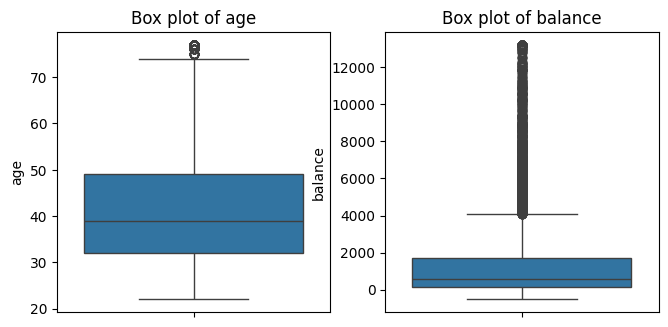

In [5]:
plt.figure(figsize=(12,8))
for i, column in enumerate(data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

In [6]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['job']=lc.fit_transform(data['job'])
data['loan']=lc.fit_transform(data['loan'])
data['contact']=lc.fit_transform(data['contact'])

In [11]:
X=data.drop(columns=['deposit'],axis=1)
y=data['deposit']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.25)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
dtc.fit(X_train_scaled,y_train)
y_pred=dtc.predict(X_test_scaled)


Accuracy: 0.6664278036546041


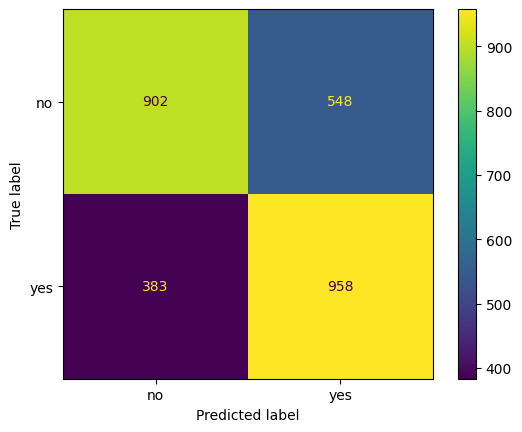

In [8]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
print("Accuracy:",accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

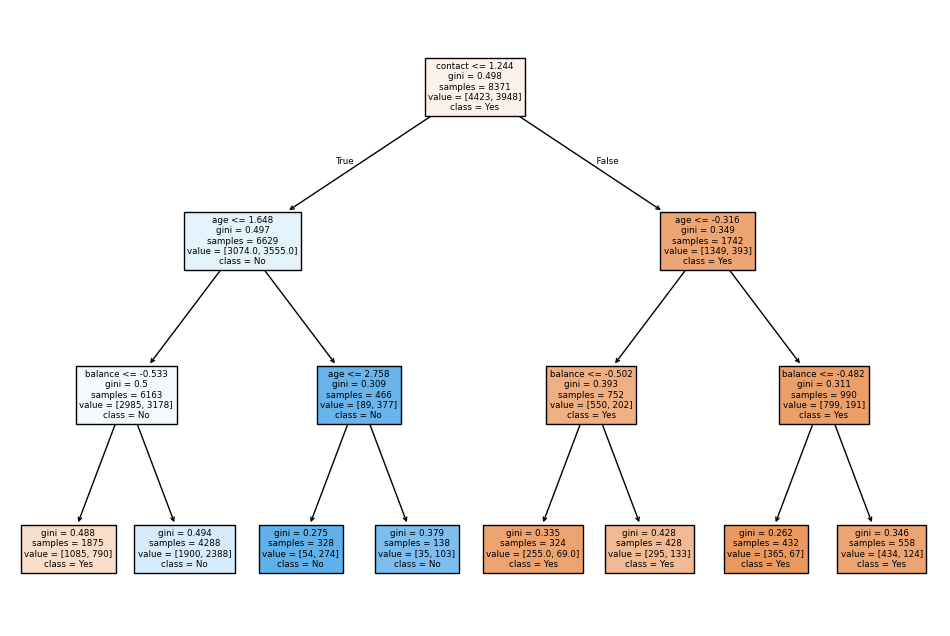

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtc,filled=True,feature_names=X.columns,class_names=['Yes','No'])
plt.show()

set